dataset: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

# Importing the required Libraries

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

# Download all NLTK resources
nltk.download('all')


In [2]:
# Reading the data
df = pd.read_csv('Reviews.csv')
print(df.shape)
df=df.head(50000)
print(df.shape)

(568454, 10)
(50000, 10)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


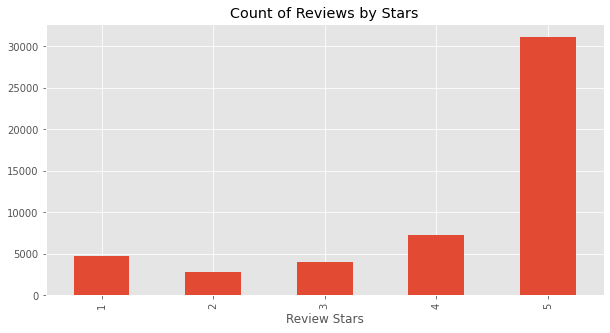

In [4]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [5]:
example = df['Text'][1] #refer back to df.head()
print(example)

Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".


# Data Preprocessing

In [6]:
#tokenization

tokens = nltk.word_tokenize(example)
tokens[:20]

['Product',
 'arrived',
 'labeled',
 'as',
 'Jumbo',
 'Salted',
 'Peanuts',
 '...',
 'the',
 'peanuts',
 'were',
 'actually',
 'small',
 'sized',
 'unsalted',
 '.',
 'Not',
 'sure',
 'if',
 'this']

In [10]:
import nltk

# Download the required NLTK resource
nltk.download('averaged_perceptron_tagger')

# Assuming 'tokens' is already defined
tagged = nltk.pos_tag(tokens)
print(tagged[:10])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('Product', 'NNP'), ('arrived', 'VBD'), ('labeled', 'VBN'), ('as', 'IN'), ('Jumbo', 'NNP'), ('Salted', 'NNP'), ('Peanuts', 'NNP'), ('...', ':'), ('the', 'DT'), ('peanuts', 'NNS')]


In [12]:
nltk.download('maxent_ne_chunker')

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


(S
  (GPE Product/NNP)
  arrived/VBD
  labeled/VBN
  as/IN
  (PERSON Jumbo/NNP Salted/NNP Peanuts/NNP)
  .../:
  the/DT
  peanuts/NNS
  were/VBD
  actually/RB
  small/JJ
  sized/VBN
  unsalted/JJ
  ./.
  Not/RB
  sure/JJ
  if/IN
  this/DT
  was/VBD
  an/DT
  error/NN
  or/CC
  if/IN
  the/DT
  vendor/NN
  intended/VBN
  to/TO
  represent/VB
  the/DT
  product/NN
  as/IN
  ``/``
  Jumbo/NNP
  ''/''
  ./.)


# VADER
 - Valence Aware Dictionary and sEntiment Reasoner

In [14]:
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


In [15]:
sia.polarity_scores('I am so happy!')


{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [16]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [17]:
# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Sentiment Score
def sentiment_score(value,compound):
    if (value >= 4 and compound >= 0.05) or compound >= 0.05 or value>=4:
        return 1  # Positive
    elif (value < 3 and compound <= -0.05) or compound <= -0.05 or value < 3:
        return -1  # Negative
    else:
        return 0  # Neutral

# Define Compound score with a whole value

def compound_score(compound):
    if compound >= 0.05:
        return 1  # Positive
    elif compound <= -0.05:
        return -1  # Negative
    else:
        return 0  # Neutral

score = {}
res = {}
approx = {}


for i, row in tqdm(df.iterrows(), total=len(df)):
    value = row['Score']
    myid = row['Id']
    text = row['Text']
    

    polarity_scores = sia.polarity_scores(text)
    res[myid] = polarity_scores
    
 
    compound_value = polarity_scores['compound']
    compound_approx = compound_score(compound_value)
    approx[myid] = compound_approx
    

    sentiment = sentiment_score(value,compound_value)
    score[myid] = sentiment




  0%|          | 0/50000 [00:00<?, ?it/s]

In [18]:
# Creating a DataFrame for the res dictionary
vaders_res = pd.DataFrame(res).T
vaders_res = vaders_res.reset_index().rename(columns={'index': 'Id'})

print("vaders_res DataFrame:")
print(vaders_res.head())

# Creating a DataFrame for the score dictionary
vaders_score = pd.DataFrame(list(score.items()), columns=['Id', 'Sentiment'])

print("vaders_score DataFrame:")
print(vaders_score.head())

#Creating a Dataframe for the compound whole values

vaders_approx = pd.DataFrame(list(approx.items()), columns=['Id', 'Approx_Sentiment'])

# Merging vaders_res and vaders_score on 'Id'
vaders = vaders_res.merge(vaders_score, how='left', on='Id')
vaders_combined = vaders.merge(vaders_approx, how='left', on='Id')

# Merging with the original df DataFrame

final_vaders = vaders_combined.merge(df, how='left', on='Id')

# Display the final DataFrame
print("final_vaders DataFrame:\n")
final_vaders.head(5)


vaders_res DataFrame:
   Id    neg    neu    pos  compound
0   1  0.000  0.695  0.305    0.9441
1   2  0.138  0.862  0.000   -0.5664
2   3  0.091  0.754  0.155    0.8265
3   4  0.000  1.000  0.000    0.0000
4   5  0.000  0.552  0.448    0.9468
vaders_score DataFrame:
   Id  Sentiment
0   1          1
1   2         -1
2   3          1
3   4         -1
4   5          1
final_vaders DataFrame:



,Id,neg,neu,pos,compound,Sentiment,Approx_Sentiment,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,1,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,-1,-1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,1,1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,-1,0,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,1,1,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [20]:
final_vaders.head(3)

,Id,neg,neu,pos,compound,Sentiment,Approx_Sentiment,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,1,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,-1,-1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,1,1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


# Accuracy

In [21]:
#calculating Accuracy
from sklearn.metrics import accuracy_score, classification_report

y_true = final_vaders['Sentiment']  
y_pred = final_vaders['Approx_Sentiment']

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_true, y_pred)
print(report)


from sklearn.metrics import mean_squared_error, mean_absolute_error


y_true = final_vaders['Sentiment']
y_pred = final_vaders['Approx_Sentiment']

# Calculating regression metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print(f"MSE: {mse}, MAE: {mae}")


Accuracy: 0.95154
              precision    recall  f1-score   support

          -1       0.71      0.91      0.80      4081
           0       0.15      1.00      0.26       150
           1       1.00      0.95      0.98     45769

    accuracy                           0.95     50000
   macro avg       0.62      0.96      0.68     50000
weighted avg       0.97      0.95      0.96     50000

MSE: 0.14134, MAE: 0.07942


Confusion Matrix:
[[43709   512  1548]
 [    0   150     0]
 [    0   363  3718]]


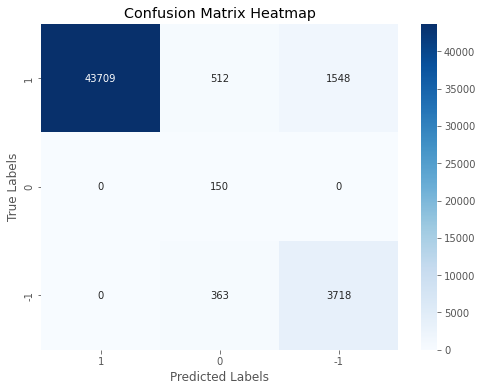

In [22]:
#creating the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = final_vaders['Sentiment']
y_pred = final_vaders['compound'].apply(compound_score)
conf_matrix = confusion_matrix(y_true, y_pred, labels=[1, 0, -1])

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
labels=[1,0,-1]
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

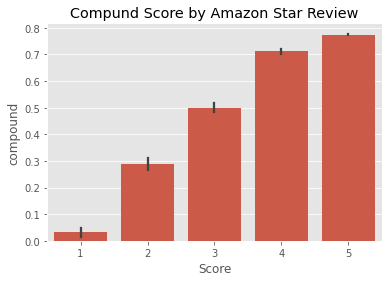

In [23]:
ax = sns.barplot(data=final_vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

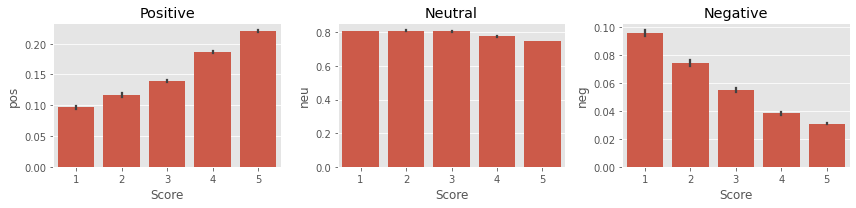

In [24]:
#graph comparision
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=final_vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=final_vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=final_vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()